In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

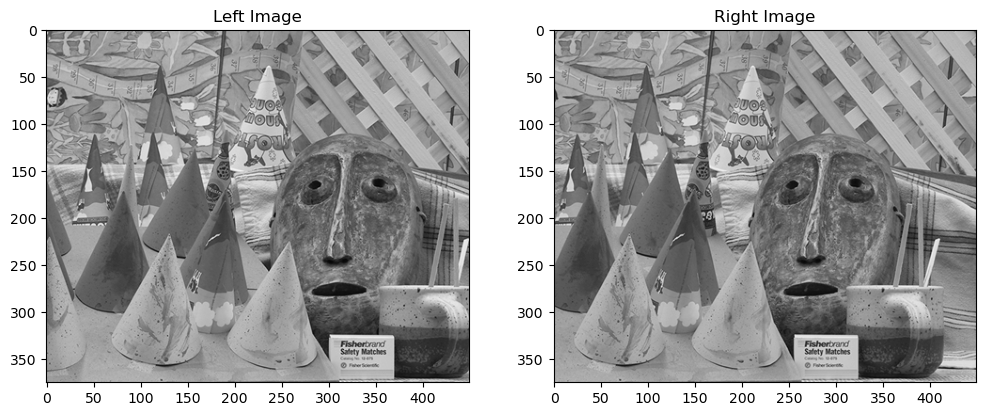

In [12]:
img_left = io.imread('data/stereo_left.png')
img_right = io.imread('data/stereo_right.png')

gray_left = cv.cvtColor(img_left, cv.COLOR_RGB2GRAY)
gray_right = cv.cvtColor(img_right, cv.COLOR_RGB2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(gray_left, cmap='gray')
ax[0].set_title('Left Image')
ax[1].imshow(gray_right, cmap='gray')
ax[1].set_title('Right Image')
plt.show()

In [ ]:
blockSize=5 # try min=3 to max=11, step=2

# The maximum disparity the algorithm will search for each pixel, 
# i.e., how far to look horizontally between the left and right images to find matching points:
numDisparities=64 # try min=16 to max=256, step=16

# A percentage value used to reject ambiguous matches:
uniquenessRatio=10 # try min=0 to max=20, step=1

# Minimum size (in pixels) of connected regions in the disparity map:
speckleWindowSize=100 # try min=0 to max=200, step=10

# aximum disparity variation between connected pixels for them to be considered part of the same region:
speckleRange=32 # try min=0 to max=64, step=4

/tmp/ipykernel_7048/3285293451.py:31: RuntimeWarning: divide by zero encountered in divide
  depth = np.where(disparity > 0, (focal_length * baseline) / disparity, 0)


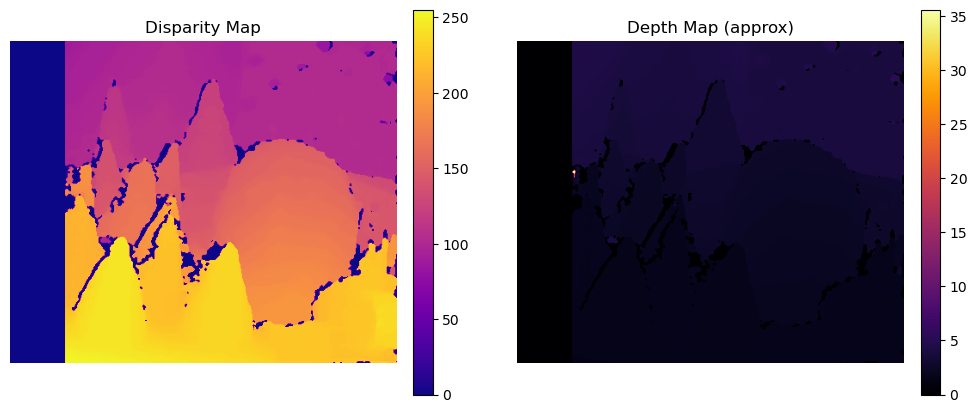

In [14]:
numDisparities = int(numDisparities // 16 * 16) # Ensure numDisparities is multiple of 16
blockSize = int(blockSize) if blockSize % 2 == 1 else int(blockSize + 1)

stereo = cv.StereoSGBM_create(
    minDisparity=0,
    numDisparities=numDisparities,
    blockSize=blockSize,
    P1=8 * 3 * blockSize ** 2,
    P2=32 * 3 * blockSize ** 2,
    uniquenessRatio=uniquenessRatio,
    speckleWindowSize=speckleWindowSize,
    speckleRange=speckleRange
)

disparity = stereo.compute(gray_left, gray_right).astype(np.float32) / 16.0

# Normalize for visualization
disp_vis = cv.normalize(disparity, None, 0, 255, cv.NORM_MINMAX)
disp_vis = np.uint8(disp_vis)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(disp_vis, cmap='plasma')
plt.title('Disparity Map')
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04)

# Depth visualization
focal_length = 800  # px
baseline = 0.1      # m
depth = np.where(disparity > 0, (focal_length * baseline) / disparity, 0)

plt.subplot(1, 2, 2)
plt.imshow(depth, cmap='inferno')
plt.title('Depth Map (approx)')
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()